In [ ]:
# 1. Copy shared Image_DB_Dir and Image_DB.tar.gz to you personal drive
# 2. Make sure the file structure is /content/drive/MyDrive/Image_DB_dir
# 3. Run this block

from google.colab import drive
import os
drive.mount('/content/drive')
if not 'Image_DB' in os.listdir('/content'):
  os.system('mkdir /content/Image_DB')
if not 'Image_DB.tar.gz' in os.listdir('/content/Image_DB'):
  if os.listdir('/content/drive/MyDrive/'):
    if 'Image_DB_Dir' in os.listdir('/content/drive/MyDrive'):
      if 'Image_DB.tar.gz' in os.listdir('/content/drive/MyDrive/Image_DB_Dir'):
        os.system('cp /content/drive/MyDrive/Image_DB_Dir/Image_DB.tar.gz /content/Image_DB')
        !tar -xzf "/content/Image_DB/Image_DB.tar.gz" -C "/content/Image_DB"
        os.system('rm -f /content/Image_DB/Image_DB.tar*')
drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Get number of PNGs for each type of scan
# Randomly build train, test, valid sets

import os
import random

db_dir = '/content/Image_DB/Image_DB/'
t1_ms = []
t2_ms = []
f_ms = []
t1_norm = []
t2_norm = []
f_norm = []
for i in os.listdir(db_dir):
  if 'OASIS' not in i:
    for j in os.listdir(db_dir+str(i)):
      if j == 'T1_PNG':
        for p in os.listdir(db_dir+'/'+i+'/'+j):
          if p not in t1_ms:
            t1_ms.append(db_dir+'/'+i+'/'+j+'/'+p)
      elif j == 'T2_PNG':
        for p in os.listdir(db_dir+'/'+i+'/'+j):
          if p not in t2_ms:
            t2_ms.append(db_dir+'/'+i+'/'+j+'/'+p)
      elif j == 'F_PNG':
        for p in os.listdir(db_dir+'/'+i+'/'+j):
          if p not in f_ms:
            f_ms.append(db_dir+'/'+i+'/'+j+'/'+p)
  else:
    for j in os.listdir(db_dir+str(i)):
      if j == 'T1_PNG':
        for p in os.listdir(db_dir+'/'+i+'/'+j):
          if p not in t1_norm:
            t1_norm.append(db_dir+'/'+i+'/'+j+'/'+p)
      elif j == 'T2_PNG':
        for p in os.listdir(db_dir+'/'+i+'/'+j):
          if p not in t2_norm:
            t2_norm.append(db_dir+'/'+i+'/'+j+'/'+p)
      elif j == 'F_PNG':
        for p in os.listdir(db_dir+'/'+i+'/'+j):
          if p not in f_ms:
            f_norm.append(db_dir+'/'+i+'/'+j+'/'+p)
print('Number of T1, T2, FLAIR MS PNGs: '+str([len(t1_ms), len(t2_ms), len(f_ms)]))
print('Number of T1, T2, FLAIR Normal PNGs: '+str([len(t1_norm), len(t2_norm), len(f_norm)]))

# generate random t2 train set
t2_train_ms = random.sample(t2_ms, 175)
t2_train_norm = random.sample(t2_norm, 1000)
os.system('rm -rf /content/Image_DB/Train')
os.system('mkdir /content/Image_DB/Train')
os.system('mkdir /content/Image_DB/Train/ms')
os.system('mkdir /content/Image_DB/Train/norm')
for i in t2_train_ms:
  copy_string = 'cp '+i+' /content/Image_DB/Train/ms'
  os.system(copy_string)
for i in t2_train_norm:
  copy_string = 'cp '+i+' /content/Image_DB/Train/norm'
  os.system(copy_string)
db_dir = '/content/Image_DB/Train/'
t2_train_dir = os.path.join(db_dir)

# generate random t2 valid set
t2_valid_ms = random.sample(t2_ms, 25)
t2_valid_norm = random.sample(t2_norm, 150)
os.system('rm -rf /content/Image_DB/Valid')
os.system('mkdir /content/Image_DB/Valid')
os.system('mkdir /content/Image_DB/Valid/ms')
os.system('mkdir /content/Image_DB/Valid/norm')
for i in t2_valid_ms:
  copy_string = 'cp '+i+' /content/Image_DB/Valid/ms'
  os.system(copy_string)
for i in t2_valid_norm:
  copy_string = 'cp '+i+' /content/Image_DB/Valid/norm'
  os.system(copy_string)
db_dir = '/content/Image_DB/Valid/'
t2_valid_dir = os.path.join(db_dir)

batch_size = 10
img_width = 500
img_height = 500

image_gen = ImageDataGenerator(
    rescale = 1. /255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,  
)

Number of T1, T2, FLAIR MS PNGs: [212, 212, 212]
Number of T1, T2, FLAIR Normal PNGs: [3108, 3048, 1015]


Found 1175 images belonging to 2 classes.
Found 175 images belonging to 2 classes.


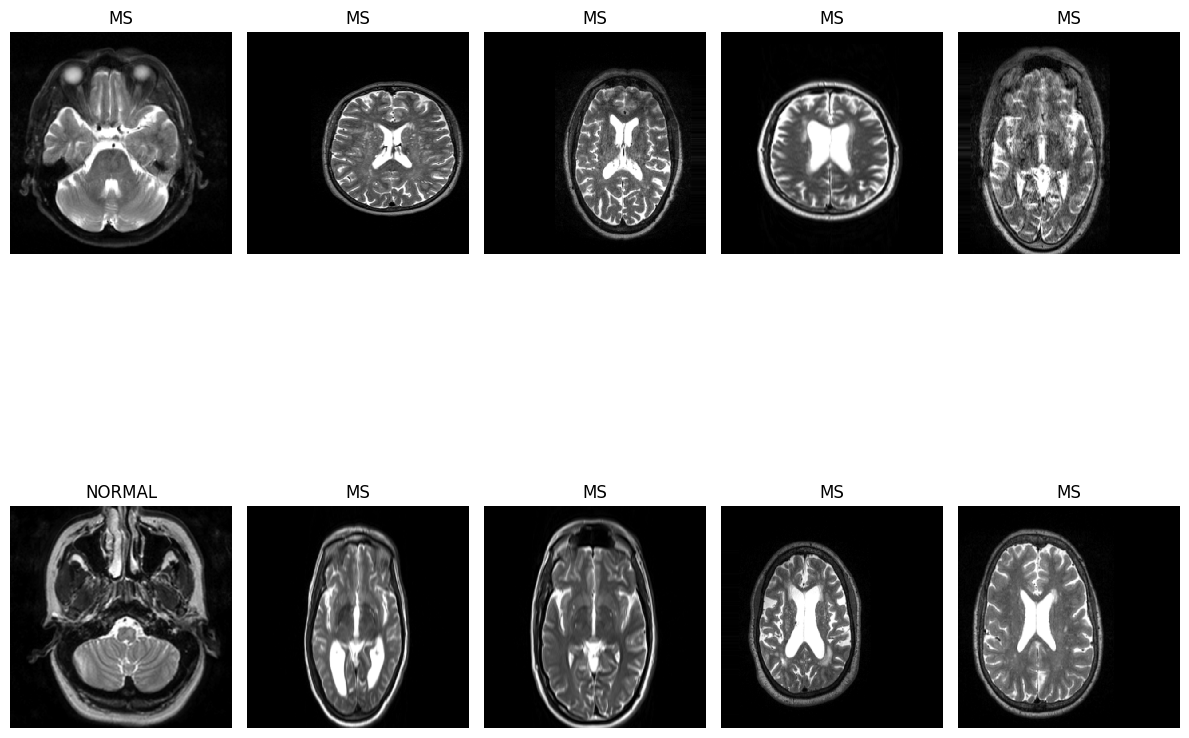

In [ ]:
# Use the selected directory paths in the flow_from_directory method
# Return (x, y) for use in fit method
train = image_gen.flow_from_directory(
     t2_train_dir,  # Use the directory path
     target_size=(img_height, img_width),
     class_mode='binary',
     batch_size=batch_size,
     color_mode='rgb'
     )
#test = image_gen.flow_from_directory(
#     t2_train_norm_dir,
#     target_size=(img_height, img_width),
#     shuffle=False,
#     class_mode='binary',
#     batch_size=batch_size,
#     color_mode='grayscale'
#     )
valid = image_gen.flow_from_directory(
     t2_valid_dir,
     target_size=(img_height, img_width),
     shuffle=False,
     class_mode='binary',
     batch_size=batch_size,
     color_mode='rgb'
     )

plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    
    X_batch, Y_batch = next(train)  # Get the next batch of data
    
    image = X_batch[0]
    label = Y_batch[0]
    
    dic = {0:'NORMAL', 1:'MS'}
    plt.title(dic.get(label))
    plt.axis('off')
    plt.imshow(np.squeeze(image), cmap='gray', interpolation='nearest')
    
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.applications import DenseNet121
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the pre-trained layers so that they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the Xception base model
model = Sequential()
model.add(base_model)
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train.classes), y=train.classes)
class_weights = dict(zip(np.unique(train.classes), class_weights))

model.summary()


29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 15, 15, 1024)      7037504   
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 32)        294944    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                       

In [ ]:
# Monitors validation loss during training and reduces the learning rate when
# Validation loss stops improving
early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.1, min_lr=0.000001)
callbacks_list = [early, learning_rate_reduction]
cw = dict(zip( np.unique(train.classes), class_weights))
print(cw)


{0: 0, 1: 1}


In [ ]:
model.fit(train,
          epochs=5, 
          validation_data=valid, 
          class_weight=cw, 
          callbacks=callbacks_list)

Epoch 1/5
118/118 [==============================] - 1383s 12s/step - loss: 0.0037 - accuracy: 0.8511 - val_loss: 19.8547 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 2/5
118/118 [==============================] - 1339s 11s/step - loss: 1.9731e-25 - accuracy: 0.8511 - val_loss: 19.9135 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 3/5
118/118 [==============================] - ETA: 0s - loss: 1.6535e-25 - accuracy: 0.8511
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
118/118 [==============================] - 1350s 11s/step - loss: 1.6535e-25 - accuracy: 0.8511 - val_loss: 19.9436 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 4/5
118/118 [==============================] - 1385s 12s/step - loss: 2.3002e-25 - accuracy: 0.8511 - val_loss: 20.1528 - val_accuracy: 0.8571 - lr: 1.0000e-04
